# K-means

In [71]:
from sklearn.cluster import MiniBatchKMeans

## 1. Choix du vecteur

In [147]:
# Choose vector
doc_vectors = reduced_features_tfidf

# For title
vec_type = 'NMF'
vec_opt = n_components

## 2. Lancement k-means

In [149]:
# K-means options
k = 24
random_state = 1

In [150]:
# Run
kmeans = MiniBatchKMeans(n_clusters=k, random_state=random_state)
kmeans.fit(doc_vectors);
kmeans_clusters = kmeans.predict(doc_vectors)

In [151]:
# Calcul des scores
print('Inertie = {:.2f}, Calisnki-Harabasz = {:.2f}, Davies-Bouldin = {:.2f}'.format(
    kmeans.inertia_,
    calinski_harabasz_score(doc_vectors,kmeans_clusters),
    davies_bouldin_score(doc_vectors,kmeans_clusters)))

Inertie = 51.05, Calisnki-Harabasz = 273.95, Davies-Bouldin = 1.07


## 3. Affichage UMAP

In [136]:
# Embedding umap
embedding = UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(doc_vectors)

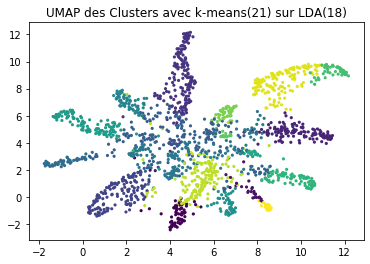

In [137]:
# Affichage
plt.scatter(embedding[:, 0], embedding[:, 1], 
    c = kmeans_clusters,
    s = 10, # size
    edgecolor='none')
plt.title("UMAP des Clusters avec k-means({}) sur {}({})".format(k,vec_type,vec_opt));

In [78]:
pca = PCA(n_components=2, random_state=1)
reduced_features_nmf = pca.fit_transform(nmf_doc_vectors)

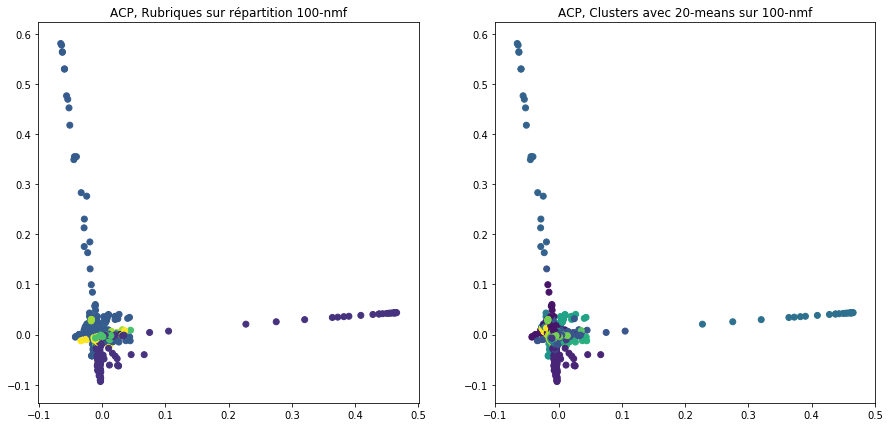

In [79]:
# Affichage ACP nmf
fig, axes = plt.subplots(1,2,figsize = (15,7))
axes[1].scatter(reduced_features_nmf[:,0], reduced_features_nmf[:,1], c=kmeans_clusters)
axes[0].scatter(reduced_features_nmf[:,0], reduced_features_nmf[:,1], c=rubint)
axes[1].set_title("ACP, Clusters avec {}-means sur {}-nmf".format(k,n_topics_nmf));
axes[0].set_title("ACP, Rubriques sur répartition {}-nmf".format(n_topics_nmf));

## 4. Choix de k

In [131]:
# Exécution des k-means
possible_k = range(1,100,1)
criterions = pd.DataFrame(columns = ['Inertie','Critère de Calinski-Harabasz','Critère de Davies-Bouldin'])
parts = np.empty((len(possible_k),len(doc_vectors)))
inerties = np.empty((len(possible_k,)))
calinski = np.empty((len(possible_k,)))
bouldin = np.empty((len(possible_k,)))
for i,k in enumerate(possible_k):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(doc_vectors);
    kmeans_clusters = kmeans.predict(doc_vectors)
    parts[i] = kmeans_clusters
    criterions.loc[k,'Inertie'] = kmeans.inertia_
    if k > 1:
        criterions.loc[k,'Critère de Calinski-Harabasz'] = calinski_harabasz_score(doc_vectors,kmeans_clusters)
        criterions.loc[k,'Critère de Davies-Bouldin'] = davies_bouldin_score(doc_vectors,kmeans_clusters)

### F.2.2 Critères

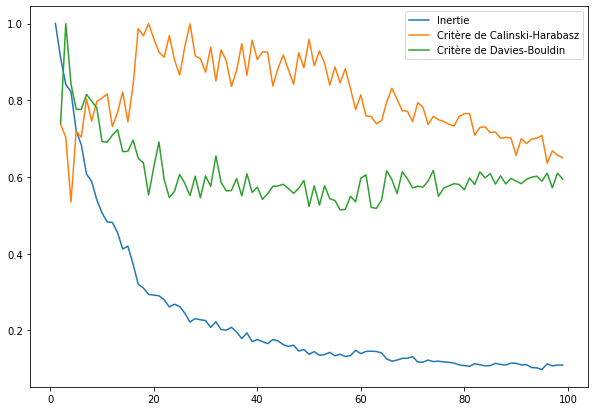

In [132]:
(criterions/criterions.max()).plot(figsize = (10,7))